<a href="https://colab.research.google.com/github/dayviddouglas/arvore_decisao_aprovacao_emprestimos/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


dados_dataset = pd.read_csv("loan_approval_dataset.csv")
dados_dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
dados_dataset.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
dados_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
dados_Atualizados = pd.DataFrame()
dados_Atualizados['id_emprestimo'] = dados_dataset['loan_id']
dados_Atualizados['nr_dependentes'] = dados_dataset[' no_of_dependents']
dados_Atualizados['educacao'] = dados_dataset[' education']
dados_Atualizados['empregado'] = dados_dataset[' self_employed']
dados_Atualizados['salario_anual'] = dados_dataset[' income_annum']
dados_Atualizados['valor_emprestimo'] = dados_dataset[' loan_amount']
dados_Atualizados['prazo_emprestimo'] = dados_dataset[' loan_term']
dados_Atualizados['pontuacao_credito'] = dados_dataset[' cibil_score']
dados_Atualizados['patrimonio_residencial'] = dados_dataset[' residential_assets_value']
dados_Atualizados['patrimonio_comercial'] = dados_dataset[' commercial_assets_value']
dados_Atualizados['patrimonio_luxo'] = dados_dataset[' luxury_assets_value']
dados_Atualizados['patrimonios_bancarios'] = dados_dataset[' bank_asset_value']
dados_Atualizados['status_emprestimo'] = dados_dataset[' loan_status']



In [ ]:
dados_Atualizados.head()

,id_emprestimo,nr_dependentes,educacao,empregado,salario_anual,valor_emprestimo,prazo_emprestimo,pontuacao_credito,patrimonio_residencial,patrimonio_comercial,patrimonio_luxo,patrimonios_bancarios,status_emprestimo
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


<h3> Verificando a existência de valores nulos.</h3>

In [ ]:

dados_Atualizados.isnull().sum()


,0
id_emprestimo,0
nr_dependentes,0
educacao,0
empregado,0
salario_anual,0
valor_emprestimo,0
prazo_emprestimo,0
pontuacao_credito,0
patrimonio_residencial,0
patrimonio_comercial,0


<h3> Verificando a existência de valores Nan(não é número).</h3>

In [ ]:
dados_Atualizados.isna().sum()

,0
id_emprestimo,0
nr_dependentes,0
educacao,0
empregado,0
salario_anual,0
valor_emprestimo,0
prazo_emprestimo,0
pontuacao_credito,0
patrimonio_residencial,0
patrimonio_comercial,0


<h3> Verificando a existência de valores duplicados.</h3>


In [ ]:
dados_Atualizados.duplicated().sum()

0

In [ ]:
dados_Atualizados.loc[dados_Atualizados['educacao'] == ' Graduate', 'educacao'] = 1
dados_Atualizados.loc[dados_Atualizados['educacao'] == ' Not Graduate', 'educacao'] = 0

In [ ]:
dados_Atualizados.loc[dados_Atualizados['empregado'] == ' No', 'empregado'] = 0
dados_Atualizados.loc[dados_Atualizados['empregado'] == ' Yes', 'empregado'] = 1

In [ ]:
dados_Atualizados.loc[dados_Atualizados['status_emprestimo'] == ' Approved', 'status_emprestimo'] = 1
dados_Atualizados.loc[dados_Atualizados['status_emprestimo'] == ' Rejected', 'status_emprestimo'] = 0

In [ ]:
dados_Atualizados['empregado'] = dados_Atualizados['empregado'].astype('int64')
dados_Atualizados['educacao'] = dados_Atualizados['educacao'].astype('int64')
dados_Atualizados['status_emprestimo'] = dados_Atualizados['status_emprestimo'].astype('int64')

In [ ]:
dados_Atualizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   id_emprestimo           4269 non-null   int64
 1   nr_dependentes          4269 non-null   int64
 2   educacao                4269 non-null   int64
 3   empregado               4269 non-null   int64
 4   salario_anual           4269 non-null   int64
 5   valor_emprestimo        4269 non-null   int64
 6   prazo_emprestimo        4269 non-null   int64
 7   pontuacao_credito       4269 non-null   int64
 8   patrimonio_residencial  4269 non-null   int64
 9   patrimonio_comercial    4269 non-null   int64
 10  patrimonio_luxo         4269 non-null   int64
 11  patrimonios_bancarios   4269 non-null   int64
 12  status_emprestimo       4269 non-null   int64
dtypes: int64(13)
memory usage: 433.7 KB


<h3>Verificando colunas que precisam de tratamento por categorização</h3>

In [ ]:
dados_Atualizados['nr_dependentes'].value_counts()

,count
nr_dependentes,
4,752
3,727
0,712
2,708
1,697
5,673


In [ ]:
dados_Atualizados['educacao'].value_counts()

,count
educacao,
1,2144
0,2125


In [ ]:
dados_Atualizados['empregado'].value_counts()

,count
empregado,
1,2150
0,2119


In [ ]:
dados_Atualizados['salario_anual'].value_counts()

,count
salario_anual,
7000000,62
4100000,59
7600000,57
4700000,56
6900000,55
...,...
3600000,33
3400000,33
9300000,33


In [ ]:
dados_Atualizados

,id_emprestimo,nr_dependentes,educacao,empregado,salario_anual,valor_emprestimo,prazo_emprestimo,pontuacao_credito,patrimonio_residencial,patrimonio_comercial,patrimonio_luxo,patrimonios_bancarios,status_emprestimo
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


<h3>Categorizando coluna salário anual</h3>

In [ ]:
dados_Atualizados.loc[(dados_Atualizados['salario_anual'] >= 200000) & (dados_Atualizados['salario_anual'] <= 1300000), 'salario_anual'] = 1
dados_Atualizados.loc[(dados_Atualizados['salario_anual'] > 1300000) & (dados_Atualizados['salario_anual'] <= 2500000), 'salario_anual'] = 2
dados_Atualizados.loc[(dados_Atualizados['salario_anual'] > 2500000) & (dados_Atualizados['salario_anual'] <= 3700000), 'salario_anual'] = 3
dados_Atualizados.loc[(dados_Atualizados['salario_anual'] > 3700000) & (dados_Atualizados['salario_anual'] <= 4700000), 'salario_anual'] = 4
dados_Atualizados.loc[(dados_Atualizados['salario_anual'] > 4700000) & (dados_Atualizados['salario_anual'] <= 5900000), 'salario_anual'] = 5
dados_Atualizados.loc[(dados_Atualizados['salario_anual'] > 5900000) & (dados_Atualizados['salario_anual'] <= 7000000), 'salario_anual'] = 6
dados_Atualizados.loc[(dados_Atualizados['salario_anual'] > 7000000) & (dados_Atualizados['salario_anual'] <= 8100000), 'salario_anual'] = 7
dados_Atualizados.loc[(dados_Atualizados['salario_anual'] > 8100000) & (dados_Atualizados['salario_anual'] <= 9900000), 'salario_anual'] = 8

<h3>Categorizando coluna valor emprestimo</h3>

In [ ]:
dados_Atualizados['valor_emprestimo'].value_counts()

,count
valor_emprestimo,
10600000,27
20000000,24
9400000,24
16800000,23
23900000,23
...,...
35800000,1
38500000,1
39500000,1


In [ ]:
dados_Atualizados.loc[(dados_Atualizados['valor_emprestimo'] >= 300000) & (dados_Atualizados['valor_emprestimo'] <= 7200000), 'valor_emprestimo'] = 1
dados_Atualizados.loc[(dados_Atualizados['valor_emprestimo'] > 7200000) & (dados_Atualizados['valor_emprestimo'] <= 13700000), 'valor_emprestimo'] = 2
dados_Atualizados.loc[(dados_Atualizados['valor_emprestimo'] > 13700000) & (dados_Atualizados['valor_emprestimo'] <= 20100000), 'valor_emprestimo'] = 3
dados_Atualizados.loc[(dados_Atualizados['valor_emprestimo'] > 20100000) & (dados_Atualizados['valor_emprestimo'] <= 39500000), 'valor_emprestimo'] = 4

<h3>Categorizando coluna prazo emprestimo</h3>

In [ ]:
dados_Atualizados['prazo_emprestimo'].value_counts()

,count
prazo_emprestimo,
6,490
12,456
4,447
10,436
18,422
16,412
20,411
14,405
2,404


In [ ]:
dados_Atualizados.loc[(dados_Atualizados['prazo_emprestimo'] >= 2) & (dados_Atualizados['prazo_emprestimo'] <= 4), 'prazo_emprestimo'] = 1
dados_Atualizados.loc[(dados_Atualizados['prazo_emprestimo'] >= 6) & (dados_Atualizados['prazo_emprestimo'] <= 8), 'prazo_emprestimo'] = 2
dados_Atualizados.loc[(dados_Atualizados['prazo_emprestimo'] >= 10) & (dados_Atualizados['prazo_emprestimo'] <= 12), 'prazo_emprestimo'] = 3
dados_Atualizados.loc[(dados_Atualizados['prazo_emprestimo'] >= 14) & (dados_Atualizados['prazo_emprestimo'] <= 16), 'prazo_emprestimo'] = 4
dados_Atualizados.loc[(dados_Atualizados['prazo_emprestimo'] >= 18) & (dados_Atualizados['prazo_emprestimo'] <= 20), 'prazo_emprestimo'] = 5

<h3>Categorizando coluna pontuação credito</h3>

In [ ]:
dados_Atualizados['pontuacao_credito'].value_counts()

,count
pontuacao_credito,
348,16
543,15
538,15
778,14
509,14
...,...
334,2
773,2
893,2


In [ ]:
dados_Atualizados.loc[(dados_Atualizados['pontuacao_credito'] >= 300) & (dados_Atualizados['pontuacao_credito'] <= 450), 'pontuacao_credito'] = 1
dados_Atualizados.loc[(dados_Atualizados['pontuacao_credito'] > 450) & (dados_Atualizados['pontuacao_credito'] <= 650), 'pontuacao_credito'] = 2
dados_Atualizados.loc[(dados_Atualizados['pontuacao_credito'] > 650) & (dados_Atualizados['pontuacao_credito'] <= 900), 'pontuacao_credito'] = 3

<h3>Categorizando coluna patrimonio residencial</h3>

In [ ]:
dados_Atualizados['patrimonio_residencial'].value_counts()

,count
patrimonio_residencial,
400000,66
500000,63
100000,60
1000000,57
600000,56
...,...
25700000,1
20300000,1
28300000,1


In [ ]:
dados_Atualizados.loc[(dados_Atualizados['patrimonio_residencial'] < 0), 'patrimonio_residencial'] = 0
dados_Atualizados.loc[(dados_Atualizados['patrimonio_residencial'] >= 0) & (dados_Atualizados['patrimonio_residencial'] <= 2000000), 'patrimonio_residencial'] = 1
dados_Atualizados.loc[(dados_Atualizados['patrimonio_residencial'] > 2000000) & (dados_Atualizados['patrimonio_residencial'] <= 5100000), 'patrimonio_residencial'] = 2
dados_Atualizados.loc[(dados_Atualizados['patrimonio_residencial'] > 5100000) & (dados_Atualizados['patrimonio_residencial'] <= 10000000), 'patrimonio_residencial'] = 3
dados_Atualizados.loc[(dados_Atualizados['patrimonio_residencial'] > 10000000) & (dados_Atualizados['patrimonio_residencial'] <= 29100000), 'patrimonio_residencial'] = 4

<h3>Categorizando coluna patrimonio comercial</h3>

In [ ]:
dados_Atualizados['patrimonio_comercial'].value_counts()

,count
patrimonio_comercial,
0,107
200000,101
100000,100
300000,90
500000,83
...,...
19400000,1
18300000,1
17400000,1


In [ ]:
dados_Atualizados.loc[(dados_Atualizados['patrimonio_comercial'] >= 0) & (dados_Atualizados['patrimonio_comercial'] <= 1200000), 'patrimonio_comercial'] = 1
dados_Atualizados.loc[(dados_Atualizados['patrimonio_comercial'] > 1200000) & (dados_Atualizados['patrimonio_comercial'] <= 3300000), 'patrimonio_comercial'] = 2
dados_Atualizados.loc[(dados_Atualizados['patrimonio_comercial'] > 3300000) & (dados_Atualizados['patrimonio_comercial'] <= 6500000), 'patrimonio_comercial'] = 3
dados_Atualizados.loc[(dados_Atualizados['patrimonio_comercial'] > 6500000) & (dados_Atualizados['patrimonio_comercial'] <= 19400000), 'patrimonio_comercial'] = 4

<h3>Categorizando coluna patrimonio bancario</h3>

In [ ]:
dados_Atualizados['patrimonios_bancarios'].value_counts()

,count
patrimonios_bancarios,
1400000,63
4900000,63
3600000,63
4500000,61
1600000,60
...,...
14600000,2
14200000,2
14400000,1


In [ ]:
dados_Atualizados.loc[(dados_Atualizados['patrimonios_bancarios'] >= 0) & (dados_Atualizados['patrimonios_bancarios'] <= 2200000), 'patrimonios_bancarios'] = 1
dados_Atualizados.loc[(dados_Atualizados['patrimonios_bancarios'] > 2200000) & (dados_Atualizados['patrimonios_bancarios'] <= 4300000), 'patrimonios_bancarios'] = 2
dados_Atualizados.loc[(dados_Atualizados['patrimonios_bancarios'] > 4300000) & (dados_Atualizados['patrimonios_bancarios'] <= 6700000), 'patrimonios_bancarios'] = 3
dados_Atualizados.loc[(dados_Atualizados['patrimonios_bancarios'] > 6700000) & (dados_Atualizados['patrimonios_bancarios'] <= 14700000), 'patrimonios_bancarios'] = 4

<h3>Categorizando coluna patrimonio de luxo</h3>

In [ ]:
dados_Atualizados['patrimonio_luxo'].value_counts()

,count
patrimonio_luxo,
6200000,26
2900000,26
20400000,26
12300000,24
12000000,24
...,...
39100000,1
37700000,1
39200000,1


In [ ]:
dados_Atualizados.loc[(dados_Atualizados['patrimonio_luxo'] >= 0) & (dados_Atualizados['patrimonio_luxo'] <= 7100000), 'patrimonio_luxo'] = 1
dados_Atualizados.loc[(dados_Atualizados['patrimonio_luxo'] > 7100000) & (dados_Atualizados['patrimonio_luxo'] <= 13800000), 'patrimonio_luxo'] = 2
dados_Atualizados.loc[(dados_Atualizados['patrimonio_luxo'] > 13800000) & (dados_Atualizados['patrimonio_luxo'] <= 20300000), 'patrimonio_luxo'] = 3
dados_Atualizados.loc[(dados_Atualizados['patrimonio_luxo'] > 20300000) & (dados_Atualizados['patrimonio_luxo'] <= 39200000), 'patrimonio_luxo'] = 4

In [ ]:
dados_Atualizados['status_emprestimo'].value_counts()

,count
status_emprestimo,
1,2656
0,1613


<h3>Selecionando variáveis de interesse</h3>

In [ ]:
df2 = dados_Atualizados
df2 = dados_Atualizados[['valor_emprestimo','prazo_emprestimo','pontuacao_credito','status_emprestimo']]

<h3>Criando variáveis para separar a variável de interesse</h3>

In [ ]:
x = df2.drop(['status_emprestimo'], axis=1)
y = df2['status_emprestimo']

<h3>Treinando o modelo</h3>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

<h3>Criando árvore de decisão</h3>

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

<h3>Plotando a imagem da árvore gerada</h3>

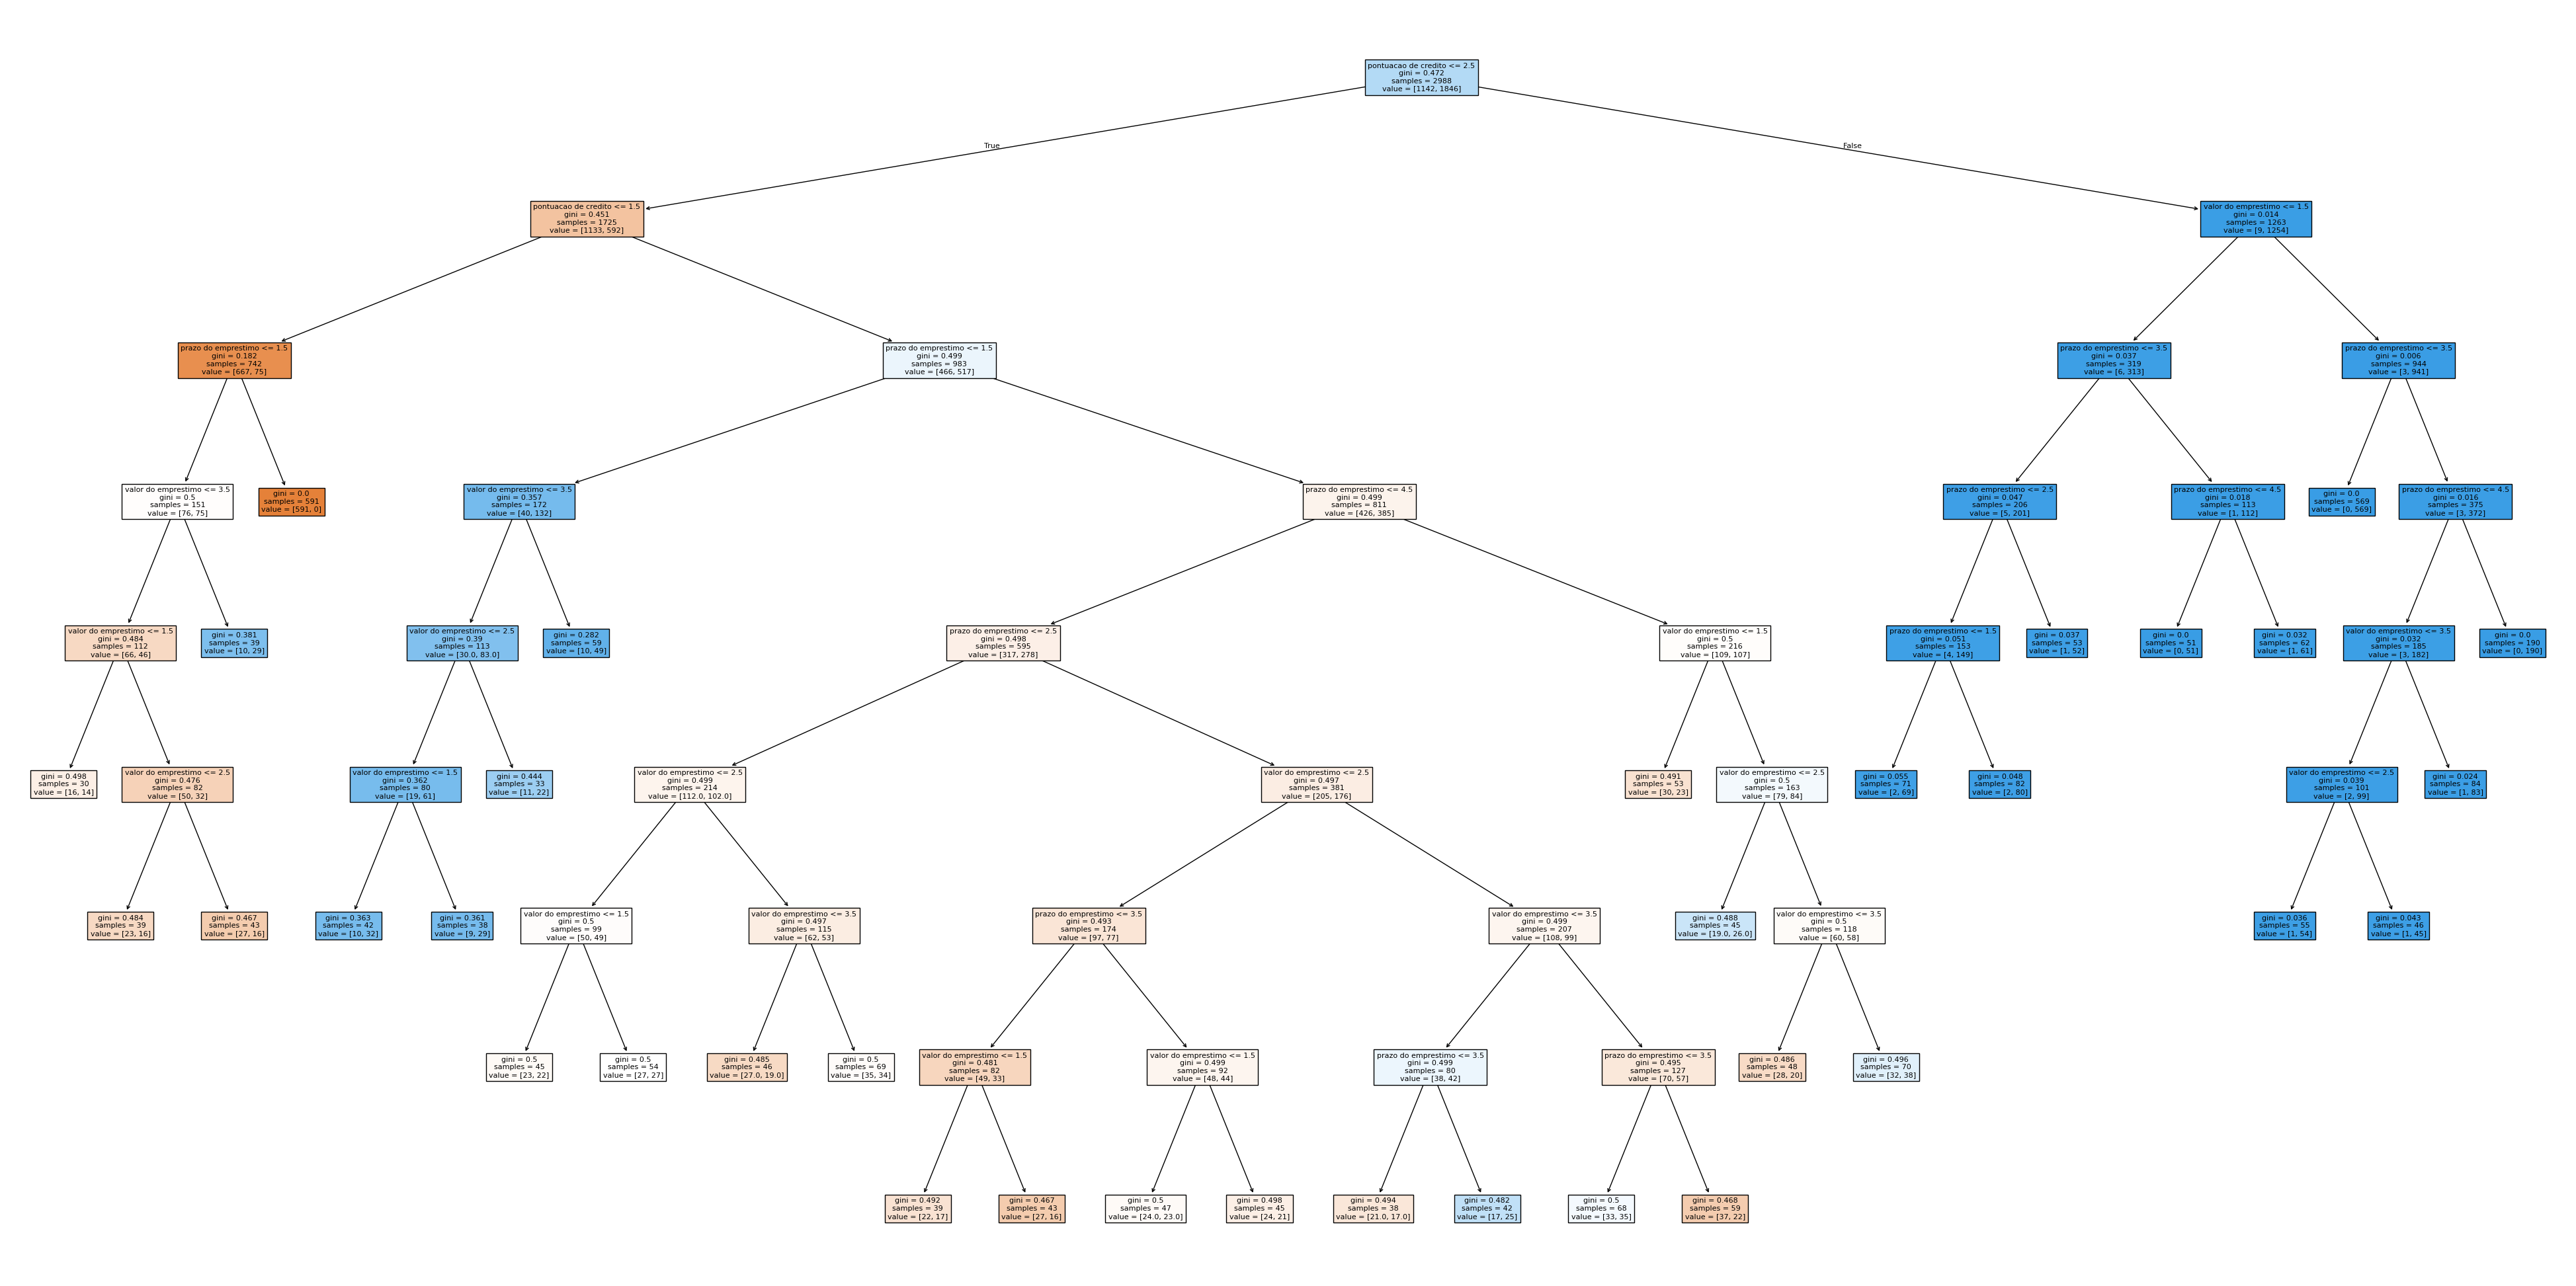

In [ ]:
plt.figure(figsize=(50,25))
tree.plot_tree(clf,feature_names=['valor do emprestimo','prazo do emprestimo','pontuacao de credito'], filled=True)
plt.show()

<h3>Calculando a acurácia do modelo</h3>

In [ ]:
y_pred = clf.predict(X_test)
accuracy = round((accuracy_score(y_test, y_pred))*100)
print(f"A acurácia do modelo é de: {accuracy}%")

A acurácia do modelo é de: 83%
